In [42]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [43]:
all_df = pd.read_csv("data/data2.csv")

In [44]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [45]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [46]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [47]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [48]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [49]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [50]:
model = Sequential()

In [51]:
model.add(Conv1D(filters=100,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(70,1), 
                 activation='relu'))

In [52]:
model.add(Conv1D(filters=50,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [53]:
model.add(MaxPooling1D(pool_size=1))

In [54]:
model.add(Dropout(0.25))

In [55]:
model.add(Flatten())

In [56]:
model.add(Dense(50, activation='tanh'))

In [57]:
model.add(Dropout(0.25))

In [58]:
model.add(Dense(2,activation='sigmoid'))

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 68, 100)           400       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 68, 50)            5050      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 68, 50)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 68, 50)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                170050    
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
__________

In [60]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [61]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/60
62752/62752 [==============================] - 53s 850us/step - loss: 0.6642 - acc: 0.5960 - val_loss: 0.6518 - val_acc: 0.6142
Epoch 2/60
62752/62752 [==============================] - 46s 733us/step - loss: 0.6513 - acc: 0.6200 - val_loss: 0.6489 - val_acc: 0.6165
Epoch 3/60
62752/62752 [==============================] - 32s 516us/step - loss: 0.6493 - acc: 0.6231 - val_loss: 0.6494 - val_acc: 0.6181
Epoch 4/60
62752/62752 [==============================] - 24s 375us/step - loss: 0.6485 - acc: 0.6232 - val_loss: 0.6490 - val_acc: 0.6184


In [62]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

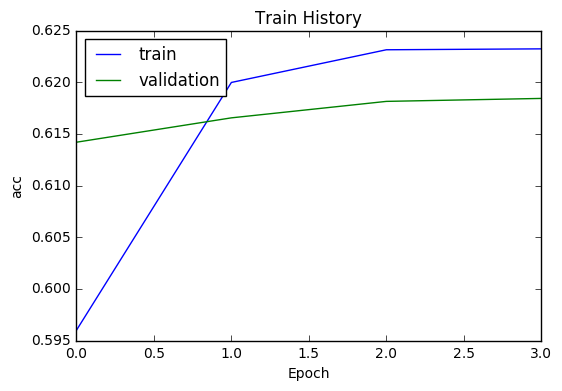

In [63]:
show_train_history(train_history,'acc','val_acc')

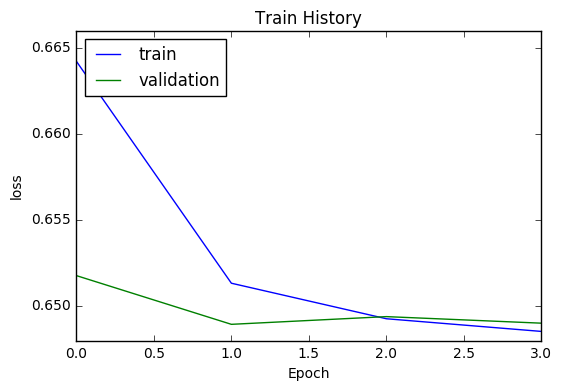

In [64]:
show_train_history(train_history,'loss','val_loss')

In [65]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 2s 118us/step


In [66]:
scores[1]

0.6198816990829257